In [1]:
# !pip install nbformat

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 폰트 깨짐 방지를 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [4]:
# 수익 표기 함수 선언
def currency(x, pos):
    return f"${x:,.0f}"

In [5]:
# # 다른 노트북 실행
# %run preprocessing.ipynb

# df:pd.DataFrame = df

df = pd.read_csv('../Data/preprocessed_movies_data.csv')

In [6]:
df.columns

Index(['Title', 'Year', 'Duration', 'MPA', 'Rating', 'Votes', 'budget',
       'grossWorldWide', 'gross_US_Canada', 'opening_weekend_Gross',
       'directors', 'writers', 'stars', 'genres', 'countries_origin',
       'filming_locations', 'production_companies', 'Languages', 'nominations',
       'oscars', 'Category'],
      dtype='object')

In [7]:
### **페르소나 2: Emily Park**
# - **직업**: 영화 제작사 리서치 분석가 (Data Analyst)
# - **목표**:
#     - 데이터 기반으로 신흥 시장 및 관객 니즈를 파악하여 새로운 영화 프로젝트의 성공 가능성을 높임.
#     - 과거 흥행 패턴을 분석해 제작사 내부에서 전략적인 의사결정을 지원.
# - **관심사**:
#     - 신흥 시장에서의 흥행 가능성이 높은 영화 장르 및 요소 분석
#     - 낮은 제작비로 높은 수익을 낼 수 있는 영화 요소 탐구
#     - 지역별로 효과적인 배급 및 마케팅 전략 수립
#     - 데이터를 활용하여 영화 제작사 내부 보고서 작성 및 시각화

In [8]:
def barplot_graph(title, data, xlabel='국가', ylabel='수익'):
    plt.figure(figsize=(10, 5))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency))
    plt.xticks(rotation=45)
    plt.tight_layout()  # 레이아웃 조정
    sns.barplot(x=data.index, y=data.values, palette='coolwarm', hue=data.index)  # 막대 위치 고정)
    plt.title(title)
    plt.show()

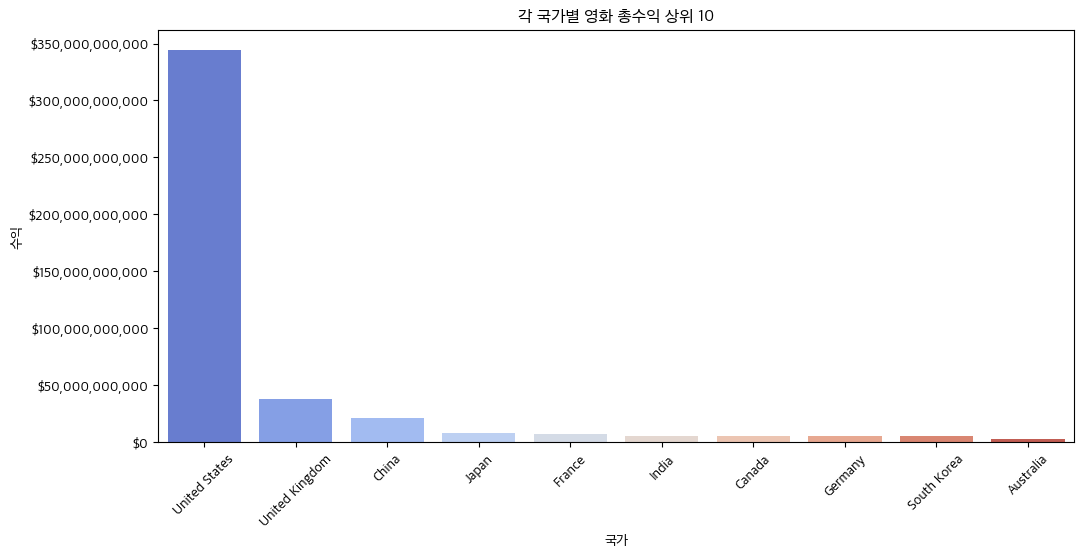

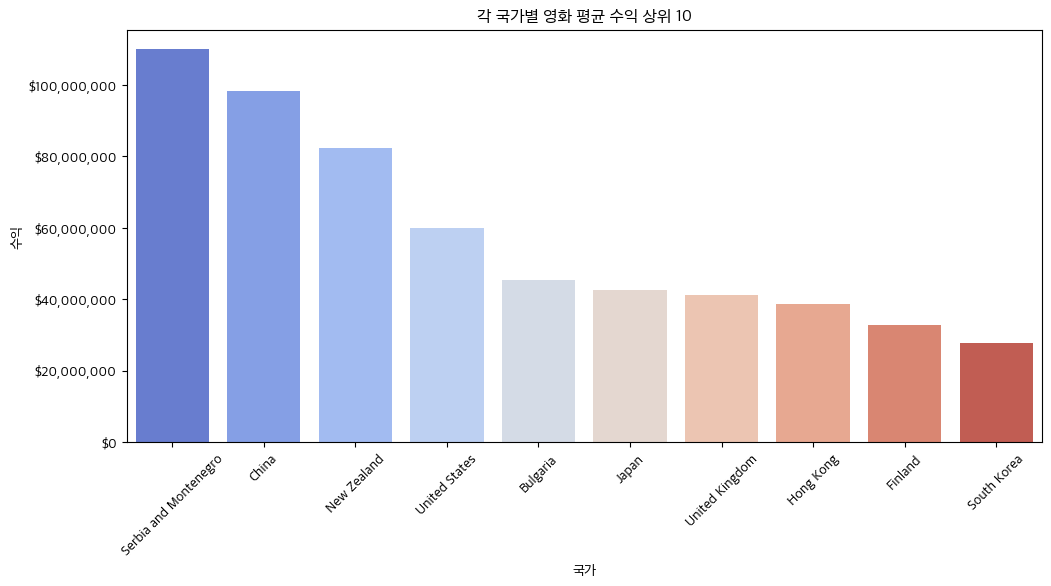

In [9]:
### **1. 신흥 시장 및 트렌드 분석**
# - 특정 국가(Countries_origin)에서 제작된 영화가 다른 국가에서도 흥행에 성공할 확률은?
# countries_origin 리스트의 첫번째 국가만 추출하여 새로운 컬럼 생성
df['country'] = df['countries_origin'].str.replace('[', '').str.replace(']', '').str.replace("'", '').str.split(',').str[0]
df_temp = df['country'].str.get_dummies(sep=', ')
# 국가별 총 수익 계산
gross_all = df_temp.mul(df['grossWorldWide'], axis=0).sum()
# 국가별 평균 수익 계산
gross_mean = df_temp.mul(df['grossWorldWide'], axis=0).sum() / df_temp.sum()
# print(df_countries.sum().sort_values(ascending=False))
# 결과 출력
    
barplot_graph('각 국가별 영화 총수익 상위 10', gross_all.sort_values(ascending=False).head(10))
barplot_graph('각 국가별 영화 평균 수익 상위 10', gross_mean.sort_values(ascending=False).head(10)) 

In [10]:
def get_mean_gross(df:pd.DataFrame, col:str, xlabel:str):
    df_temp = df[col].str.replace('[', '').str.replace(']', '').str.replace("'", '').str.get_dummies(sep=', ')
    gross_all = df_temp.mul(df['grossWorldWide'], axis=0).sum()
    gross_mean = df_temp.mul(df['grossWorldWide'], axis=0).sum() / df_temp.sum()
    barplot_graph(f'{xlabel}별 영화 총수익 상위 10', gross_all.sort_values(ascending=False).head(10), xlabel=xlabel)
    barplot_graph(f'{xlabel}별 영화 평균 수익 상위 10', gross_mean.sort_values(ascending=False).head(10), xlabel=xlabel)

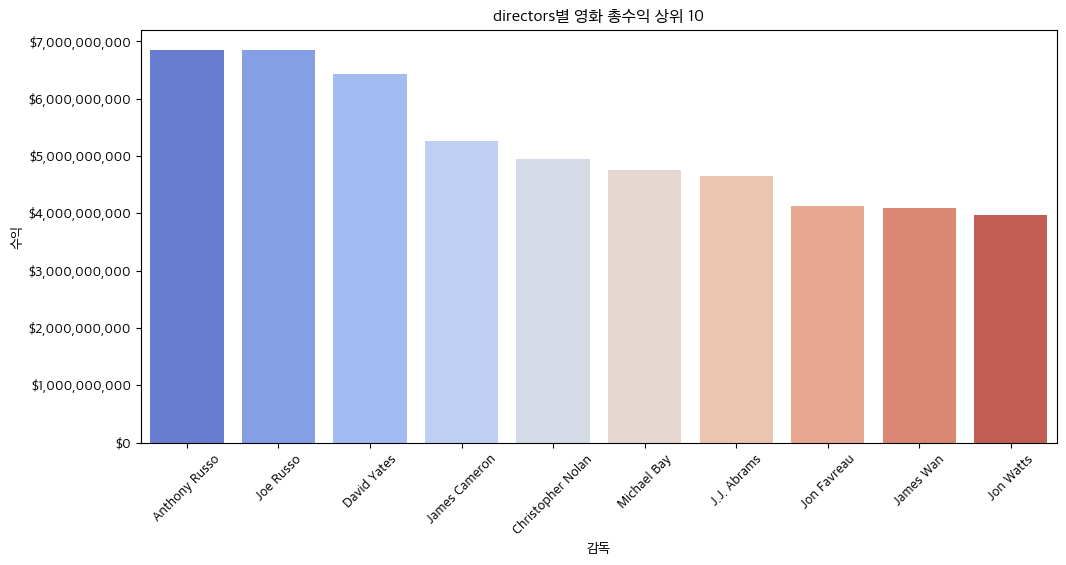

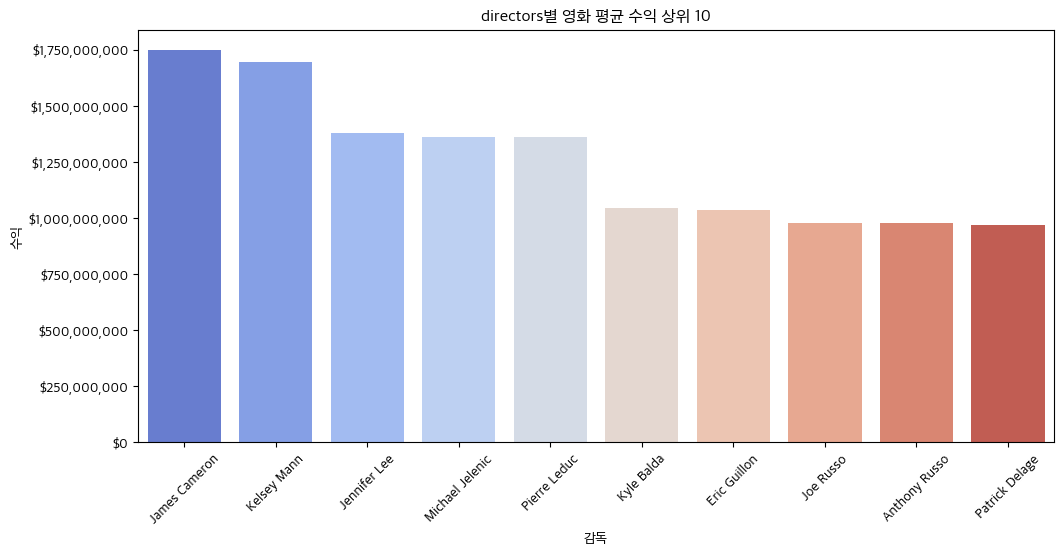

In [11]:
get_mean_gross(df, 'directors', xlabel='감독')

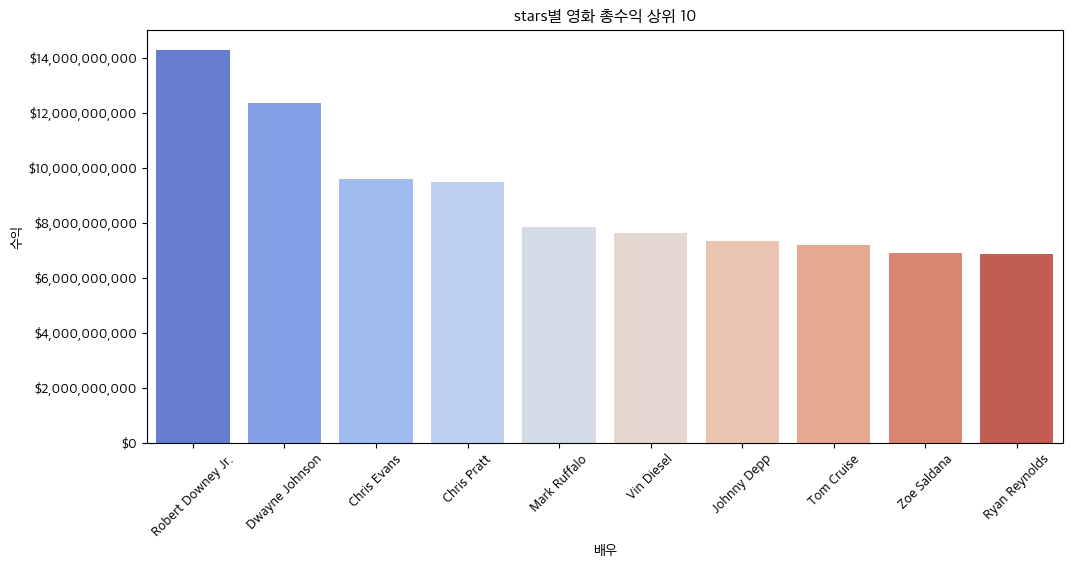

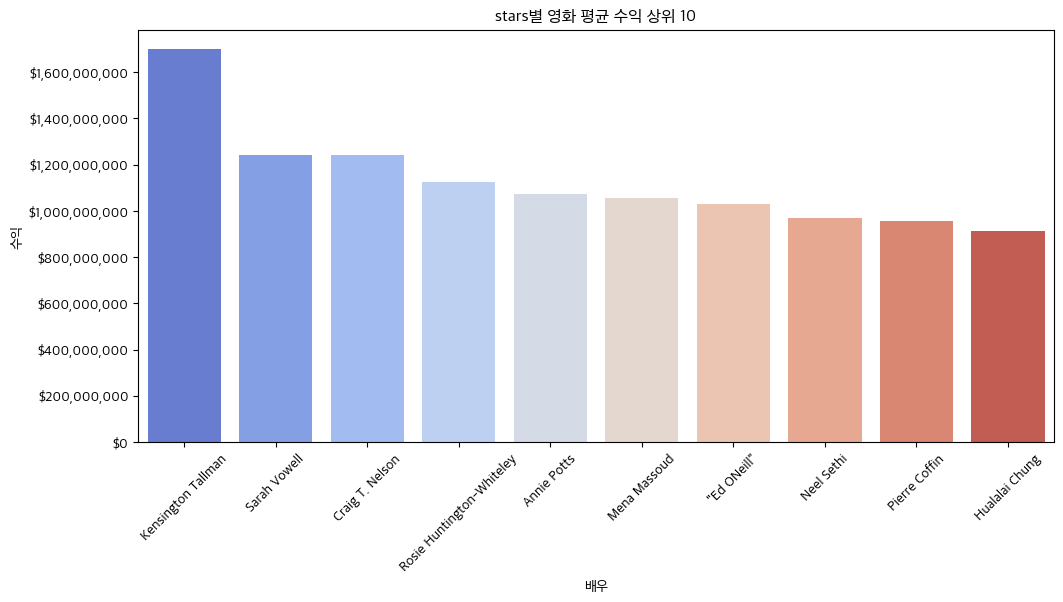

In [12]:
get_mean_gross(df, 'stars', xlabel='배우')

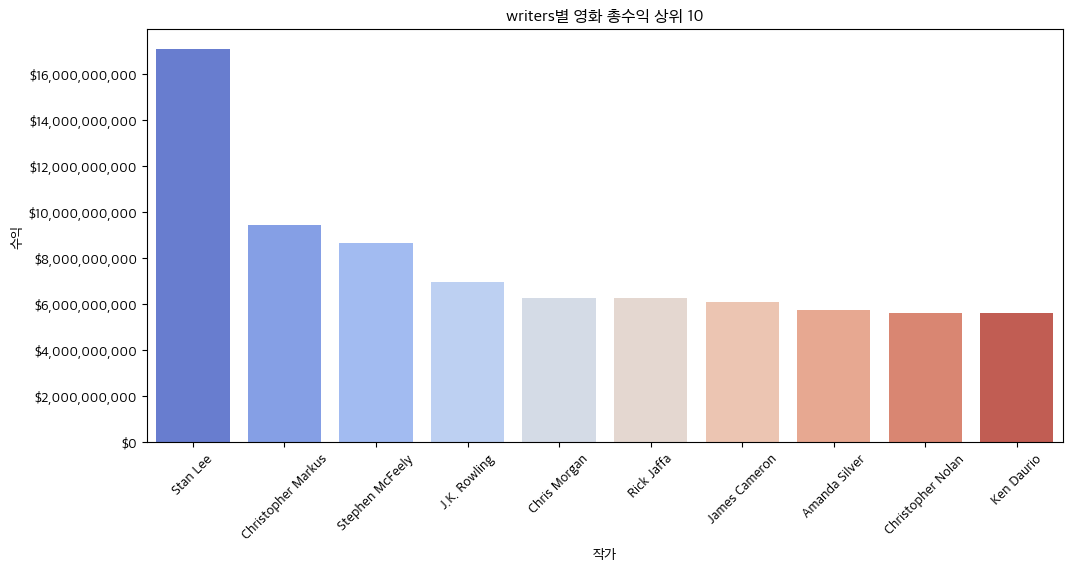

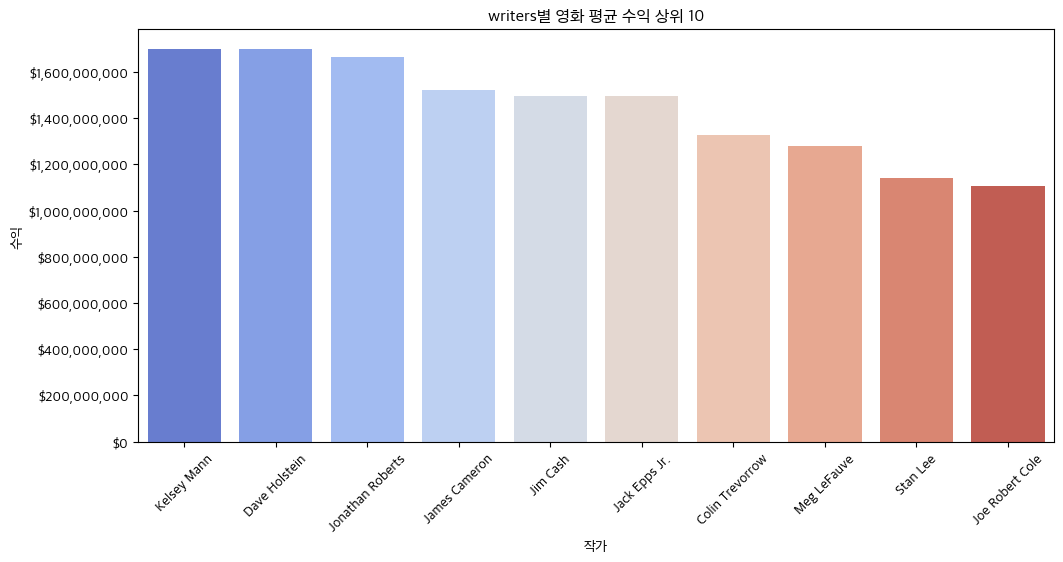

In [13]:
get_mean_gross(df, 'writers', xlabel='작가')

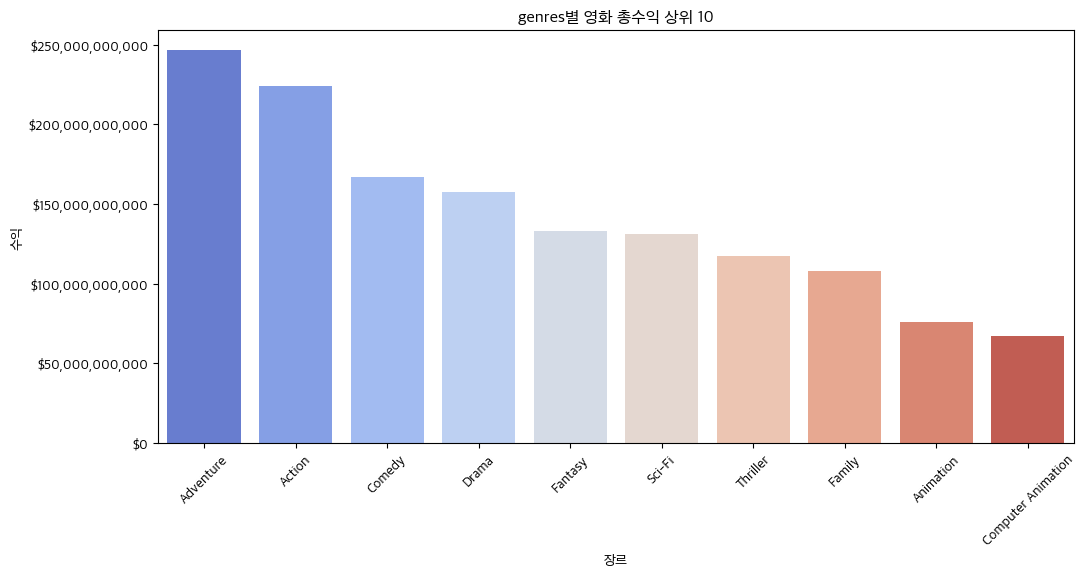

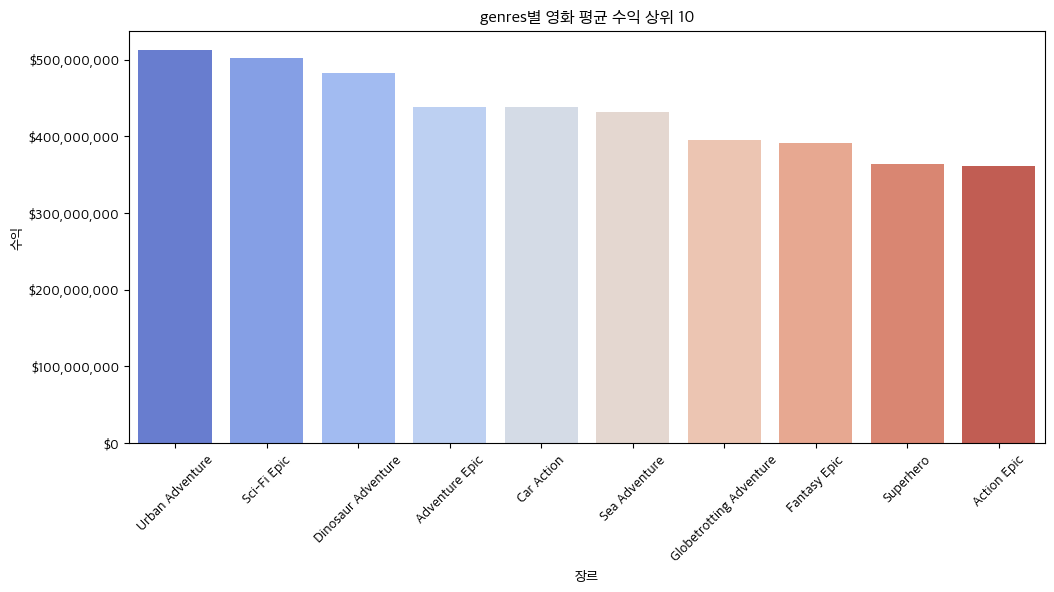

In [14]:
get_mean_gross(df, 'genres', xlabel='장르')

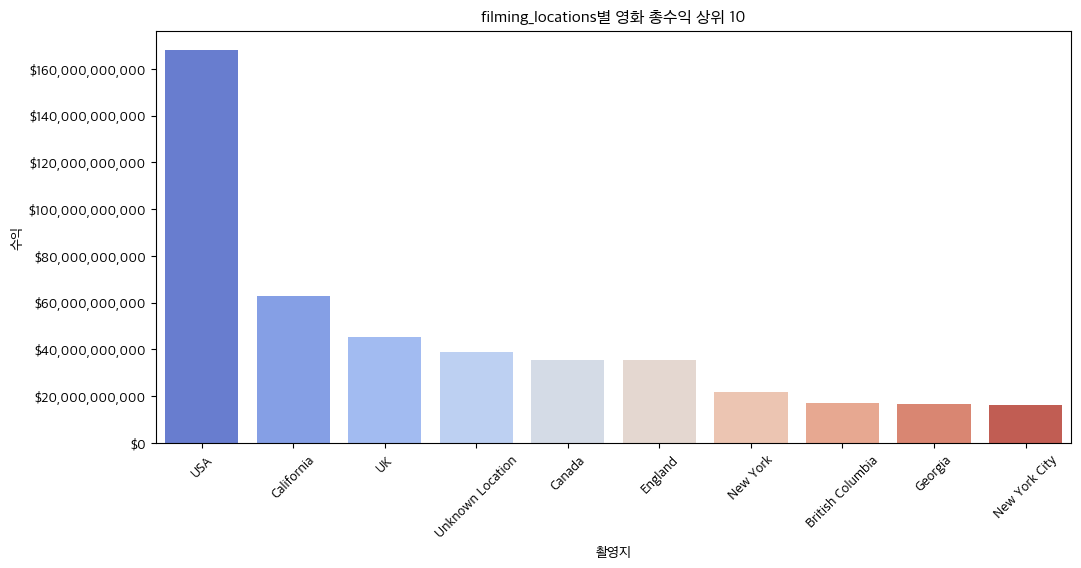

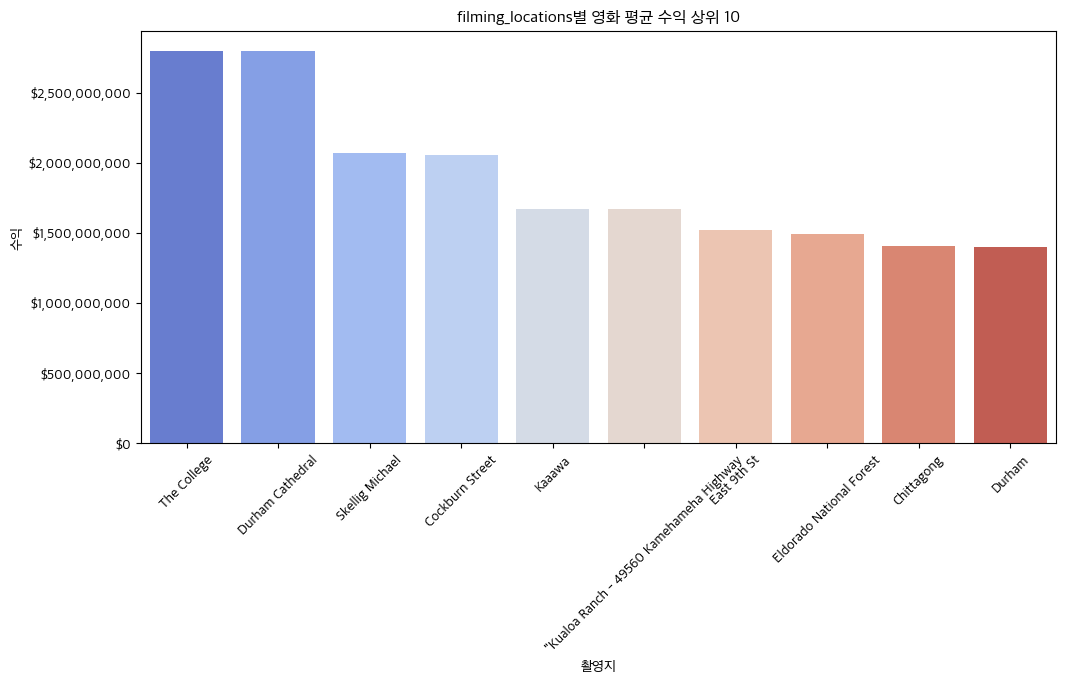

In [15]:
get_mean_gross(df, 'filming_locations', xlabel='촬영지')

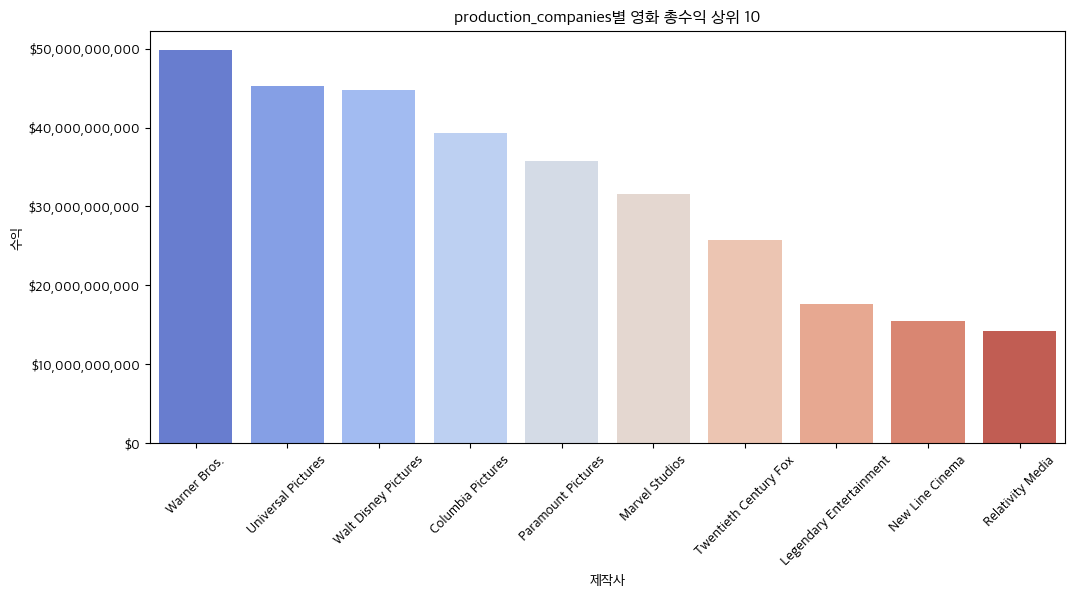

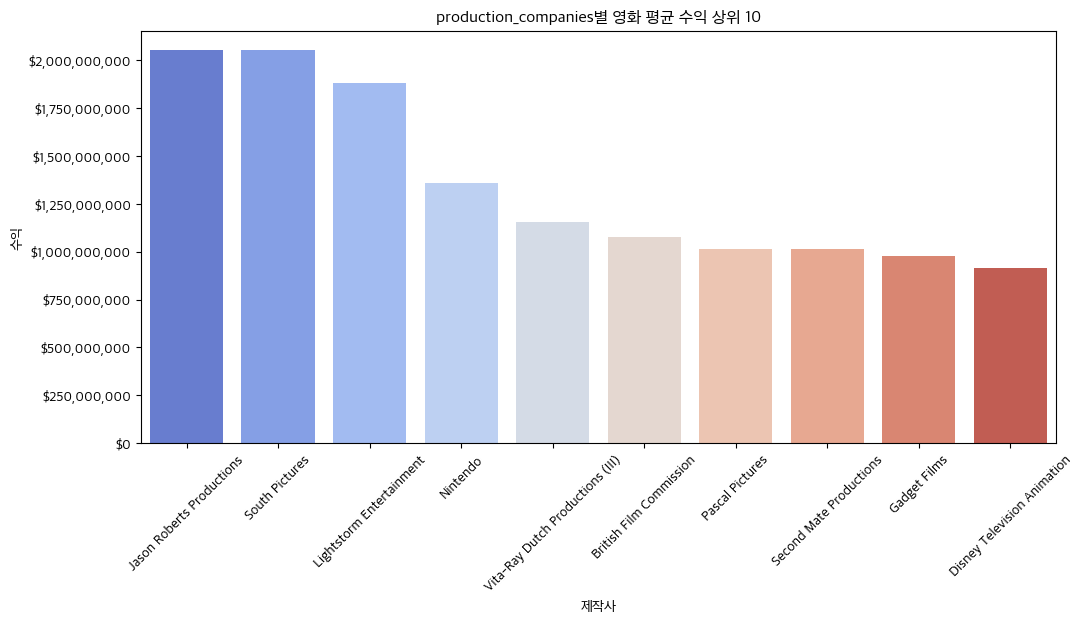

In [16]:
get_mean_gross(df, 'production_companies', xlabel='제작사')

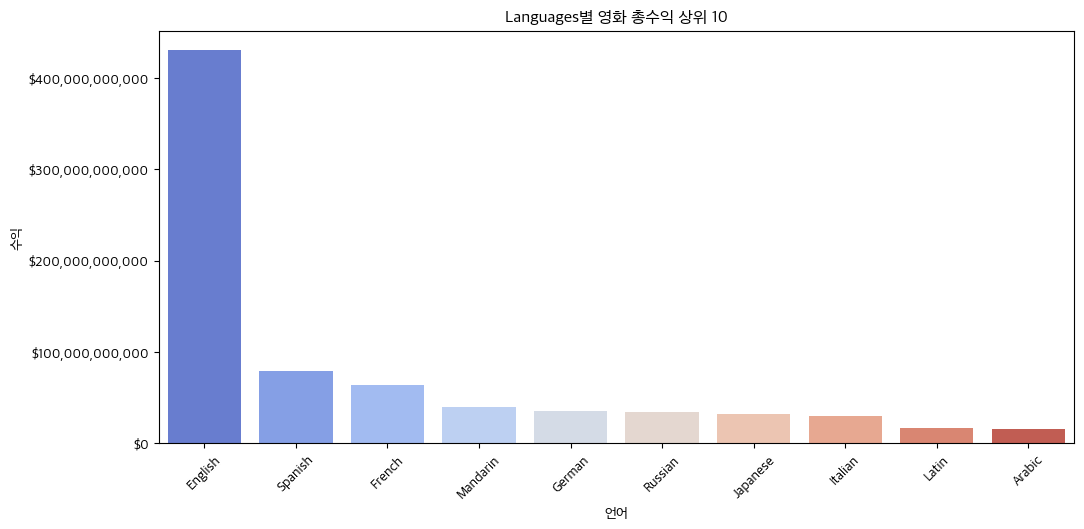

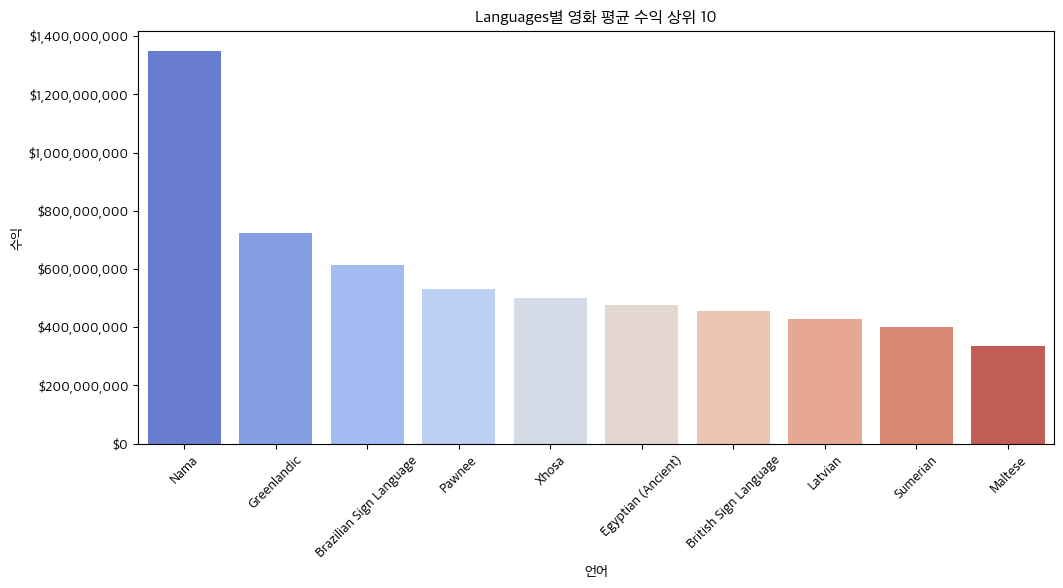

In [17]:
get_mean_gross(df, 'Languages', xlabel='언어')

In [18]:
# - 저예산 영화(Budget < 특정 금액) 중 높은 수익률을 기록한 영화의 주요 특징은?
# 500만 달러 이하의 저예산 영화 중 수익이 높은 영화 10편
df[df['budget'] <= 5000000].sort_values(by='grossWorldWide', ascending=False).head(10)

,Title,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,...,stars,genres,countries_origin,filming_locations,production_companies,Languages,nominations,oscars,Category,country
9560,11. Taylor Swift: The Eras Tour,2023,169.0,PG-13,8.0,24000.0,3.670882e+06,261656269.0,180756269.0,93224755.0,...,"['Taylor Swift', 'Mike Meadows', 'Max Bernstein']","['Concert', 'Documentary', 'Music', 'Musical']",['United States'],"['SoFi Stadium - 1001 Stadium Drive, Inglewood...","['Silent House', 'Taylor Swift Productions']",['English'],9,0,Other,United States
6264,15. Get Out,2017,104.0,R,7.8,742000.0,4.500000e+06,255751443.0,176196665.0,33377060.0,...,"['Daniel Kaluuya', 'Allison Williams', 'Bradle...","['Dark Comedy', 'Psychological Horror', 'Psych...","['United States', 'Japan']","['Fairhope, Alabama, USA']","['Universal Pictures', 'Blumhouse Productions'...","['English', 'Swahili']",214,0,Comedy,United States
3225,26. Paranormal Activity 3,2011,83.0,R,5.8,101000.0,5.000000e+06,207039844.0,104028807.0,52568183.0,...,"['Chloe Csengery', 'Jessica Tyler Brown', 'Chr...","['Found Footage Horror', 'Horror', 'Mystery', ...",['United States'],['USA'],"['Paramount Pictures', 'Blumhouse Productions'...",['English'],6,0,Horror,United States
1026,27. Paranormal Activity,2007,86.0,R,6.3,263000.0,1.500000e+04,193355933.0,107918810.0,77873.0,...,"['Katie Featherston', 'Micah Sloat', 'Mark Fre...","['B-Horror', 'Found Footage Horror', 'Supernat...",['United States'],"['Bavarian Drive, Rancho Peñasquitos, San Dieg...","['Paramount Pictures', 'Dreamworks Pictures', ...",['English'],12,0,Horror,United States
2739,40. Paranormal Activity 2,2010,91.0,R,5.7,112000.0,3.000000e+06,177512032.0,84752907.0,40678424.0,...,"['Katie Featherston', 'Micah Sloat', 'Molly Ep...","['Found Footage Horror', 'Supernatural Horror'...",['United States'],"['Woodland Hills, Los Angeles, California, USA']","['Paramount Pictures', 'Blumhouse Productions'...","['English', 'Spanish']",2,0,Horror,United States
4241,42. Insidious: Chapter 2,2013,106.0,PG-13,6.6,194000.0,5.000000e+06,161919318.0,83586447.0,40272103.0,...,"['Patrick Wilson', 'Rose Byrne', 'Barbara Hers...","['Supernatural Horror', 'Horror', 'Mystery', '...","['United Kingdom', 'Canada', 'United States']",['Linda Vista Hospital - 610 S. St. Louis Stre...,"['FilmDistrict', 'Stage 6 Films', 'Entertainme...",['English'],0,0,Horror,United Kingdom
5795,46. Lights Out,2016,81.0,PG-13,6.3,146000.0,4.900000e+06,149368835.0,67268835.0,21688103.0,...,"['Teresa Palmer', 'Gabriel Bateman', 'Maria Be...","['Supernatural Horror', 'Horror', 'Mystery']",['United States'],"['Los Angeles, California, USA']","['New Line Cinema', 'RatPac-Dune Entertainment...",['English'],9,0,Horror,United States
20,21. Saw II,2005,93.0,R,6.6,284000.0,4.000000e+06,147748505.0,87039965.0,31725652.0,...,"['Donnie Wahlberg', 'Beverley Mitchell', 'Fran...","['Splatter Horror', 'Horror', 'Mystery']","['Canada', 'United States']","['Toronto, Ontario, Canada']","['Lionsgate', 'Twisted Pictures', 'Evolution E...",['English'],11,0,Horror,Canada
6300,51. Happy Death Day,2017,96.0,PG-13,6.6,172000.0,4.800000e+06,125479266.0,55683845.0,26039025.0,...,"['Jessica Rothe', 'Israel Broussard', 'Ruby Mo...","['Dark Comedy', 'Slasher Horror', 'Teen Horror...",['United States'],"[""Corky's Restaurant and Bar - 5043 Van Nuys B...","['Universal Pictures', 'Blumhouse Productions'...","['English', 'Spanish']",0,0,Comedy,United States
4815,66. Ouija,2014,89.0,PG-13,4.5,59000.0,5.000000e+06,103687316.0,50856010.0,19875995.0,...,"['Olivia Cooke', 'Ana Coto', 'Daren Kagasoff']","['Slasher Horror', 'Supernatural Horror', 'Tee...",['United States'],"['Clark Residences - 306 Loma Drive, Los Angel...","['Universal Pictures', 'Platinum Dunes', 'Blum...",['English'],0,0,Horror,United States


In [19]:
# - 지역별 흥행 장르(Genres)의 트렌드는 어떻게 변화하고 있나요?
df.groupby(['Year', 'country', 'Category'])['grossWorldWide'].mean().sort_values(ascending=False).head(20) # 국가별 장르별 평균 수익

Year  country         Category
2009  United States   Epic        1.642056e+09
2014  New Zealand     Epic        9.622539e+08
2013  New Zealand     Epic        9.590791e+08
2009  United Kingdom  Epic        9.410559e+08
2015  United States   Epic        9.295161e+08
2021  China           Epic        9.025485e+08
2012  United States   Epic        8.255275e+08
2011  United Kingdom  Fantasy     7.682337e+08
2019  United States   Epic        7.392499e+08
      China           Epic        7.131090e+08
2017  United States   Epic        7.005778e+08
2022  China           Epic        6.265717e+08
2008  United States   Epic        6.107263e+08
2011  United States   Epic        5.032119e+08
2022  United States   Epic        4.705673e+08
2020  China           Epic        4.614216e+08
2013  United Kingdom  Epic        4.557268e+08
2016  China           Epic        4.390489e+08
2010  United States   Epic        4.244105e+08
2005  United States   Epic        4.213300e+08
Name: grossWorldWide, dtype: 

In [20]:
### **2. 비용 대비 효율성 분석**
# - 저예산 영화(Budget)의 평균 수익률(GrossWorldwide)은 어떤가요?
df[df['budget'] <= 5000000]['grossWorldWide'].mean() # 저예산 영화의 평균 수익

np.float64(3323431.1757631823)

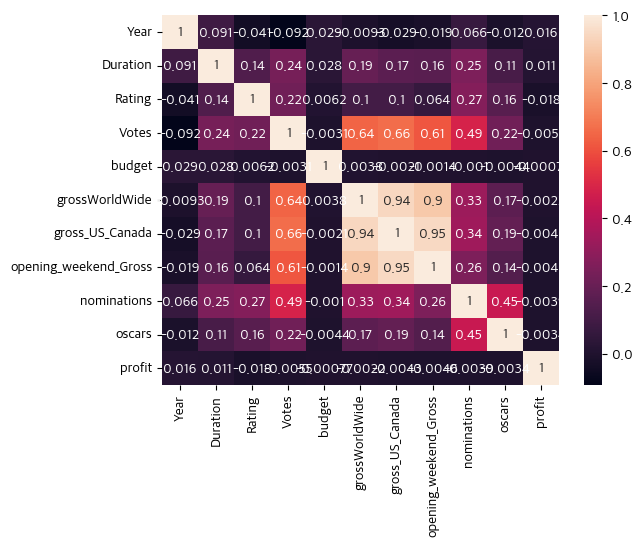

In [21]:
# - 제작비 대비 흥행 성공 가능성이 높은 제작 요소(장르, 감독, 배우)는 무엇인가요?
df['profit'] = df['grossWorldWide'] / df['budget']
corr_matrix = df.corr(numeric_only=True) # 상관계수 행렬
corr_matrix

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [22]:
# df.groupby('genres')['profit'].mean().sort_values(ascending=False) # 장르별 수익률
# # df.groupby('Category')['profit'].mean().sort_values(ascending=False) # 장르별 수익률
# # df.groupby('directors')['profit'].mean().sort_values(ascending=False) # 감독별 수익률
# # df.groupby('writers')['profit'].mean().sort_values(ascending=False) # 작가별 수익률
# # df.groupby('stars')['profit'].mean().sort_values(ascending=False) # 배우별 수익률

In [23]:
# - 개봉 첫 주 수익(opening_weekend_Gross) 비중이 큰 영화의 특징은 무엇인가요?
# 개봉 첫 주 수익이 높은
df.sort_values(by='opening_weekend_Gross', ascending=False).head()
# 스타워즈, 어벤져스, 슈퍼히어로 무비 SF movies

,Title,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,...,genres,countries_origin,filming_locations,production_companies,Languages,nominations,oscars,Category,country,profit
7300,1. Avengers: Endgame,2019,181.0,PG-13,8.4,1300000.0,356000000.0,2.799439e+09,858373000.0,357115007.0,...,"['Space Sci-Fi', 'Superhero', 'Time Travel', '...",['United States'],"['Durham Cathedral, The College, Durham, Count...",['Marvel Studios'],"['English', 'Japanese', 'Xhosa', 'German']",133,1,Action,United States,7.863593
8450,1. Spider-Man: No Way Home,2021,148.0,PG-13,8.2,926000.0,200000000.0,1.952724e+09,814866759.0,260138569.0,...,"['Superhero', 'Supernatural Fantasy', 'Urban A...",['United States'],['Iceland'],"['Columbia Pictures', 'Pascal Pictures', 'Marv...",['English'],71,1,Fantasy,United States,9.763619
6801,2. Avengers: Infinity War,2018,149.0,PG-13,8.4,1300000.0,321000000.0,2.052415e+09,678815482.0,257698183.0,...,"['Space Sci-Fi', 'Superhero', 'Action', 'Adven...","['United States', 'Norway']","['Cockburn Street, Edinburgh, City of Edinburg...","['Marvel Studios', 'Jason Roberts Productions'...",['English'],81,1,Action,United States,6.393816
5250,1. Star Wars: Episode VII - The Force Awakens,2015,138.0,PG-13,7.8,990000.0,245000000.0,2.071310e+09,936662225.0,247966675.0,...,"['Action Epic', 'Adventure Epic', 'Globetrotti...","['United States', 'United Kingdom']","['Skellig Michael, County Kerry, Ireland']","['Lucasfilm', 'Bad Robot']",['English'],140,5,Epic,United States,8.454327
6250,1. Star Wars: Episode VIII - The Last Jedi,2017,152.0,PG-13,6.9,687000.0,317000000.0,1.334408e+09,620181382.0,220009584.0,...,"['Action Epic', 'Adventure Epic', 'Fantasy Epi...",['United States'],"['Salar de Uyuni, Bolivia']","['Lucasfilm', 'Ram Bergman Productions', 'Bad ...",['English'],99,4,Epic,United States,4.209488


<Axes: xlabel='Category'>

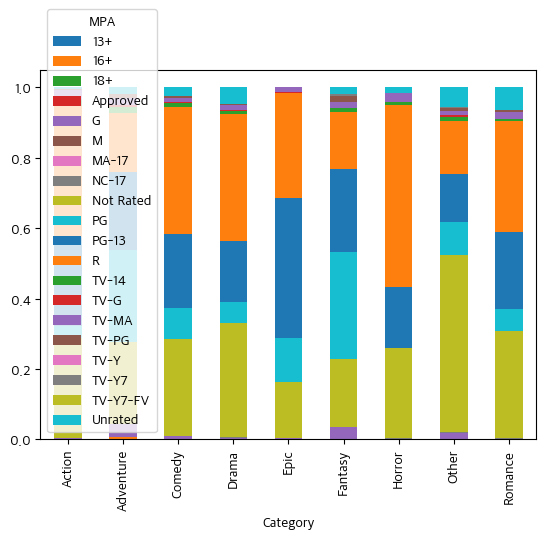

In [24]:
### **3. 관객 분석 및 타겟팅**
# - 특정 장르별 주요 관객층(MPA Rating 기준) 분석은 어떻게 나타나나요?
df.groupby('Category')['MPA'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)# 장르별 등급 비율

In [25]:
# - IMDb 평점(Rating)이 높은 영화는 어떤 요소(장르, 배우, 감독, 제작사 등)와 연관이 있나요?
df[df['Votes'] >= 10000.0].sort_values(by='Rating', ascending=False).head(10)

,Title,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,...,genres,countries_origin,filming_locations,production_companies,Languages,nominations,oscars,Category,country,profit
10567,468. Attack on Titan the Movie: The Last Attack,2024,145.0,Not Rated,9.3,10000.0,5.644354e+08,7.796800e+06,0.0,0.0,...,"['Action', 'Animation', 'Drama']",['Japan'],['Unknown Location'],['Mappa'],['Japanese'],0,0,Action,Japan,0.013813
1550,1. The Dark Knight,2008,152.0,PG-13,9.0,3000000.0,1.850000e+08,1.009054e+09,534987076.0,158411483.0,...,"['Action Epic', 'Epic', 'Superhero', 'Action',...","['United States', 'United Kingdom']","['Chicago, Illinois, USA']","['Warner Bros.', 'Legendary Entertainment', 'S...","['English', 'Mandarin']",164,0,Epic,United States,5.454344
2705,6. Inception,2010,148.0,PG-13,8.8,2600000.0,1.600000e+08,8.390306e+08,292587330.0,62785337.0,...,"['Action Epic', 'Adventure Epic', 'Psychologic...","['United States', 'United Kingdom']","['Fortress Mountain, Kananaskis Country, Alber...","['Warner Bros.', 'Legendary Entertainment', 'S...","['English', 'Japanese', 'French']",220,0,Epic,United States,5.243941
10026,477. 12th Fail,2023,147.0,Not Rated,8.8,139000.0,2.450000e+07,1.382880e+05,0.0,0.0,...,"['Docudrama', 'Biography', 'Drama']",['India'],"['Chambal Valley, Madhya Pradesh, India']","['Vinod Chopra Films', 'Zee Studios']",['Hindi'],37,0,Drama,India,0.005644
8898,449. Jai Bhim,2021,164.0,Approved,8.7,223000.0,5.322545e+07,0.000000e+00,0.0,0.0,...,"['Legal Drama', 'Crime', 'Drama']","['India', 'United States']",['Unknown Location'],['2D Entertainment'],['Tamil'],20,0,Drama,India,0.000000
8929,480. Demon Slayer: Kimetsu no Yaiba - Tsuzumi ...,2021,87.0,Not Rated,8.7,28000.0,2.874636e+08,6.735800e+04,0.0,0.0,...,"['Anime', 'Action', 'Animation', 'Fantasy']",['Japan'],['Unknown Location'],['Unknown Studio'],['Japanese'],0,0,Fantasy,Japan,0.000234
4762,13. Interstellar,2014,169.0,PG-13,8.7,2200000.0,1.650000e+08,7.407992e+08,203227580.0,47510360.0,...,"['Adventure Epic', 'Epic', 'Quest', 'Sci-Fi Ep...","['United States', 'United Kingdom', 'Canada']",['Iceland'],"['Paramount Pictures', 'Warner Bros.', 'Legend...",['English'],148,0,Epic,United States,4.489692
8359,510. Soorarai Pottru,2020,153.0,Not Rated,8.7,127000.0,1.500000e+08,0.000000e+00,0.0,0.0,...,['Drama'],['India'],"['Madurai, Tamil Nadu, India']","['2D Entertainment', 'Sikhya Entertainment', '...",['Tamil'],24,0,Drama,India,0.000000
10436,337. Viduthalai Part 2,2024,170.0,Not Rated,8.6,14000.0,7.181667e+07,2.346470e+05,0.0,0.0,...,"['Action', 'Crime', 'Drama', 'Thriller']",['India'],['Unknown Location'],"['Grass Root Film Company', 'RS Infotainment']",['Tamil'],0,0,Action,India,0.003267
9042,93. The Legend of Maula Jatt,2022,153.0,Not Rated,8.6,11000.0,7.000000e+08,1.394154e+07,5016493.0,0.0,...,"['Action', 'Drama', 'Fantasy', 'History', 'Thr...",['Pakistan'],"['Punjab, Pakistan']","['Encyclomedia', 'Lashari Films', 'AAA Motion ...","['Punjabi', 'Urdu', 'English']",0,0,Fantasy,Pakistan,0.019916


In [26]:
def barplot_graph1(title, data, xlabel='국가', ylabel='수익'):
    plt.figure(figsize=(10, 5))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()  # 레이아웃 조정
    sns.barplot(x=data.index, y=data.values, palette='coolwarm', hue=data.index)  # 막대 위치 고정)
    plt.title(title)
    plt.show()

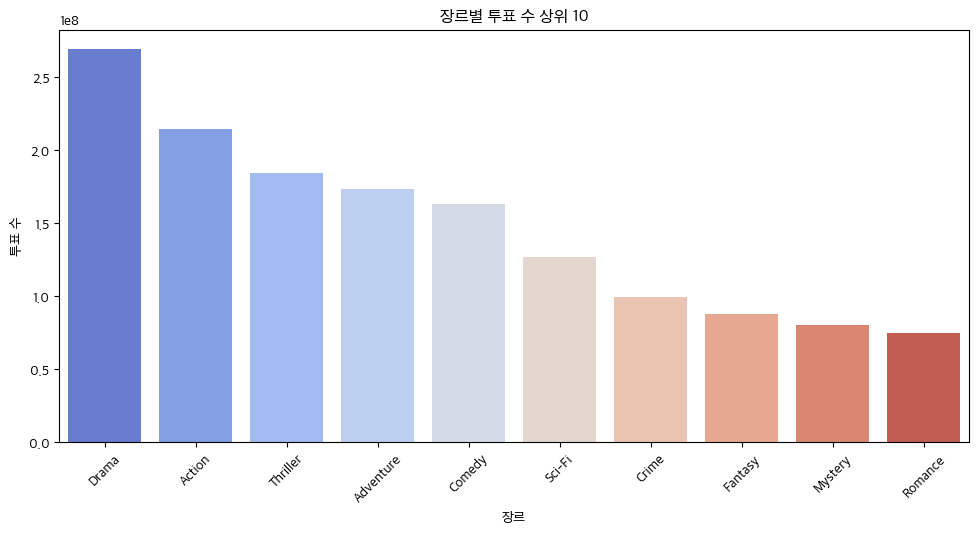

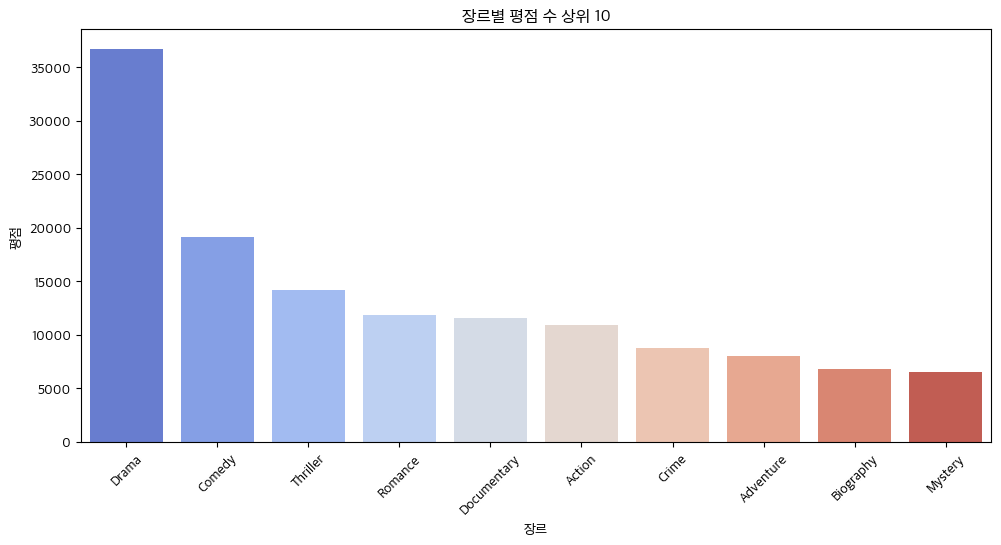

In [27]:
# - 장르와 IMDb 투표 수(Votes)의 관계를 통해 인기 장르를 분석할 수 있을까요?
df['genres'] = df['genres'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
df_temp = df['genres'].str.get_dummies(sep=', ')

# 장르별 투표 수
votes_all = df_temp.mul(df['Votes'], axis=0).sum()
votes_mean = df_temp.mul(df['Votes'], axis=0).sum() / df_temp.sum()
barplot_graph1('장르별 투표 수 상위 10', votes_all.sort_values(ascending=False).head(10), ylabel='투표 수', xlabel='장르')

votes_all = df_temp.mul(df['Rating'], axis=0).sum()
votes_mean = df_temp.mul(df['Rating'], axis=0).sum() / df_temp.sum()
barplot_graph1('장르별 평점 수 상위 10', votes_all.sort_values(ascending=False).head(10), ylabel='평점', xlabel='장르')

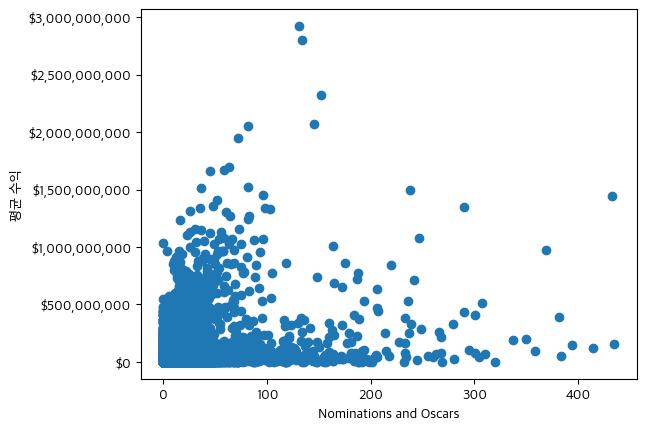

In [28]:
### **4. 영화제 및 수상과의 관계**
# - 영화 수상 횟수(Wins)와 글로벌 흥행(GrossWorldwide) 간의 관계는?
df.groupby('nominations')['grossWorldWide'].mean().sort_values(ascending=False) # 수상 횟수별 평균 수익
df.groupby('oscars')['grossWorldWide'].mean().sort_values(ascending=False) # 수상 횟수별 평균 수익
plt.scatter(df['nominations'] + df['oscars'], df['grossWorldWide'])
plt.xlabel('Nominations and Oscars')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency))
plt.ylabel('평균 수익')
plt.show()

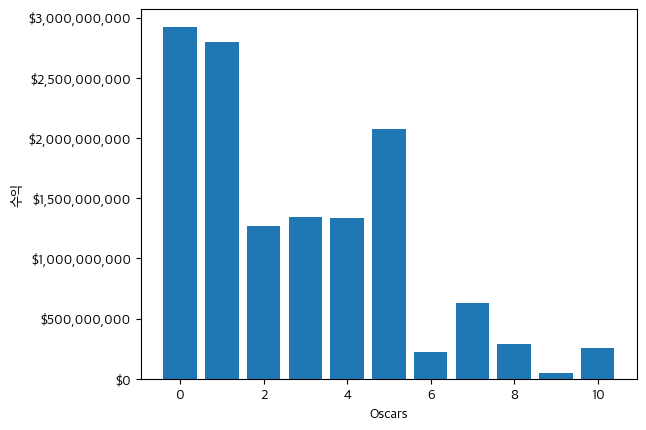

In [29]:
# - 특정 영화제가 흥행 성과에 미치는 영향은 어느 정도인가요? (예: 오스카 후보 포함 여부)
plt.bar(df['oscars'], df['grossWorldWide'])
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(currency))
plt.xlabel('Oscars')
plt.ylabel('수익')
plt.show()

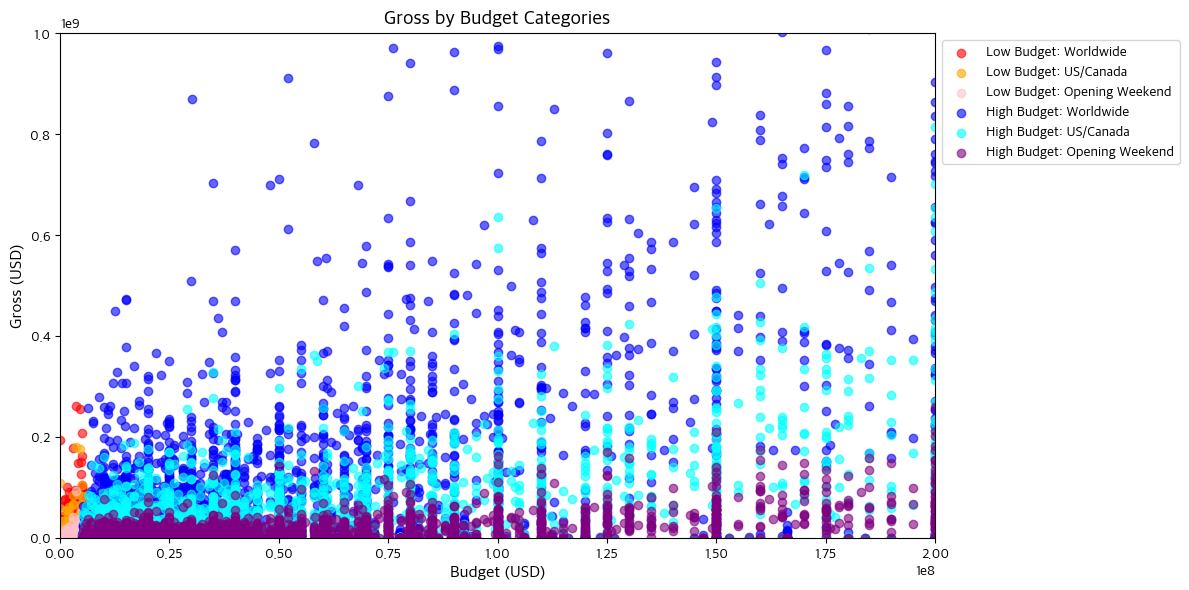

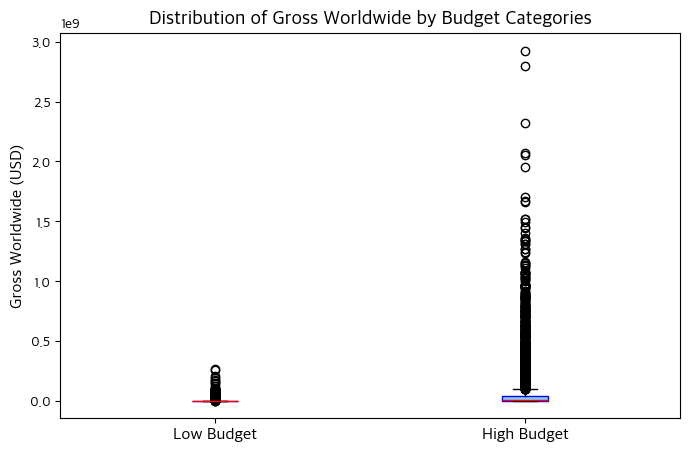

In [30]:
# 저예산 영화의 기준은 500만 달러
# low_budget = df[df['budget'] <= 5000000]
# high_budget = df[df['budget'] > 5000000]
# plt.scatter(low_budget['budget'], low_budget['grossWorldWide'], color='red', label='Low Budget')
# plt.scatter(low_budget['budget'], low_budget['gross_US_Canada'], color='red', label='Low Budget')
# plt.scatter(low_budget['budget'], low_budget['opening_weekend_Gross'], color='red', label='Low Budget')
# # plt.xlim(0, 5e6)
# plt.ylim(0, 1e9)
# plt.xlabel('Budget')
# plt.ylabel('Gross Worldwide')
# # plt.show()
# plt.scatter(high_budget['budget'], high_budget['grossWorldWide'], color='blue', label='High Budget')
# plt.scatter(high_budget['budget'], high_budget['gross_US_Canada'], color='blue', label='High Budget')
# plt.scatter(high_budget['budget'], high_budget['opening_weekend_Gross'], color='blue', label='High Budget')
# plt.xlim(0, 2e8)
# plt.show()

# plt.boxplot([low_budget['grossWorldWide'], high_budget['grossWorldWide']])
# Low and High budget 데이터 분리
low_budget = df[df['budget'] <= 5e6]
high_budget = df[df['budget'] > 5e6]

# 산점도
plt.figure(figsize=(12, 6))

# Low Budget 데이터
plt.scatter(low_budget['budget'], low_budget['grossWorldWide'], color='red', label='Low Budget: Worldwide', alpha=0.6)
plt.scatter(low_budget['budget'], low_budget['gross_US_Canada'], color='orange', label='Low Budget: US/Canada', alpha=0.6)
plt.scatter(low_budget['budget'], low_budget['opening_weekend_Gross'], color='pink', label='Low Budget: Opening Weekend', alpha=0.6)

# High Budget 데이터
plt.scatter(high_budget['budget'], high_budget['grossWorldWide'], color='blue', label='High Budget: Worldwide', alpha=0.6)
plt.scatter(high_budget['budget'], high_budget['gross_US_Canada'], color='cyan', label='High Budget: US/Canada', alpha=0.6)
plt.scatter(high_budget['budget'], high_budget['opening_weekend_Gross'], color='purple', label='High Budget: Opening Weekend', alpha=0.6)

# 축 설정
plt.xlim(0, 2e8)
plt.ylim(0, 1e9)
plt.xlabel('Budget (USD)', fontsize=12)
plt.ylabel('Gross (USD)', fontsize=12)
plt.title('Gross by Budget Categories', fontsize=14)

# 범례
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.tight_layout()
plt.show()

# 박스플롯
plt.figure(figsize=(8, 5))
box_data = [low_budget['grossWorldWide'], high_budget['grossWorldWide']]
plt.boxplot(box_data, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'), medianprops=dict(color='red'))

# X축 레이블
plt.xticks([1, 2], ['Low Budget', 'High Budget'], fontsize=12)
plt.ylabel('Gross Worldwide (USD)', fontsize=12)
plt.title('Distribution of Gross Worldwide by Budget Categories', fontsize=14)
plt.show()

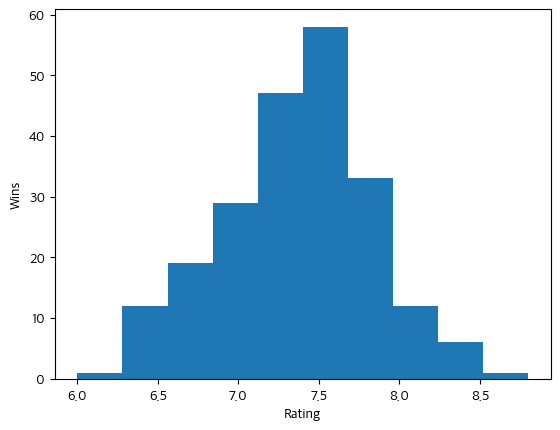

In [31]:
# 3. **IMDb 평점 상위 영화와 수상 여부**
#     - 수상 여부와 평점 간의 관계를 히스토그램으로 나타냄
df['Wins'] = df['oscars'] + df['nominations']
df_wins_rate = df.groupby('Wins')['Rating'].mean().sort_values(ascending=False) # 수상 횟수별 평균 평점
plt.hist(df_wins_rate)
plt.xlabel('Rating')
plt.ylabel('Wins')
plt.show()


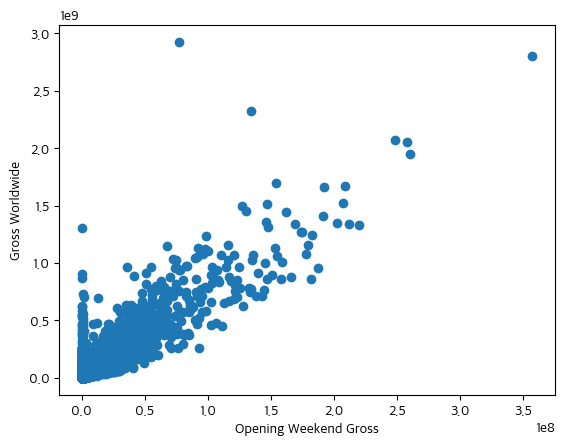

In [32]:
# 4. **개봉 첫 주 수익과 최종 글로벌 수익 관계**
#     - 개봉 첫 주 수익이 전체 흥행에 미치는 영향을 산점도로 표현
plt.scatter(df['opening_weekend_Gross'], df['grossWorldWide'])
plt.xlabel('Opening Weekend Gross')
plt.ylabel('Gross Worldwide')
plt.show()

Category
Other        6.842732
Epic         6.815574
Adventure    6.575926
Drama        6.557952
Romance      6.410624
Comedy       6.119516
Fantasy      6.092777
Action       6.089612
Horror       5.508567
Name: Rating, dtype: float64 Category
Epic         2.914656e+08
Fantasy      1.206715e+08
Action       9.423882e+07
Horror       3.370988e+07
Comedy       3.106667e+07
Adventure    2.712173e+07
Romance      1.813692e+07
Drama        1.383030e+07
Other        2.955716e+06
Name: grossWorldWide, dtype: float64


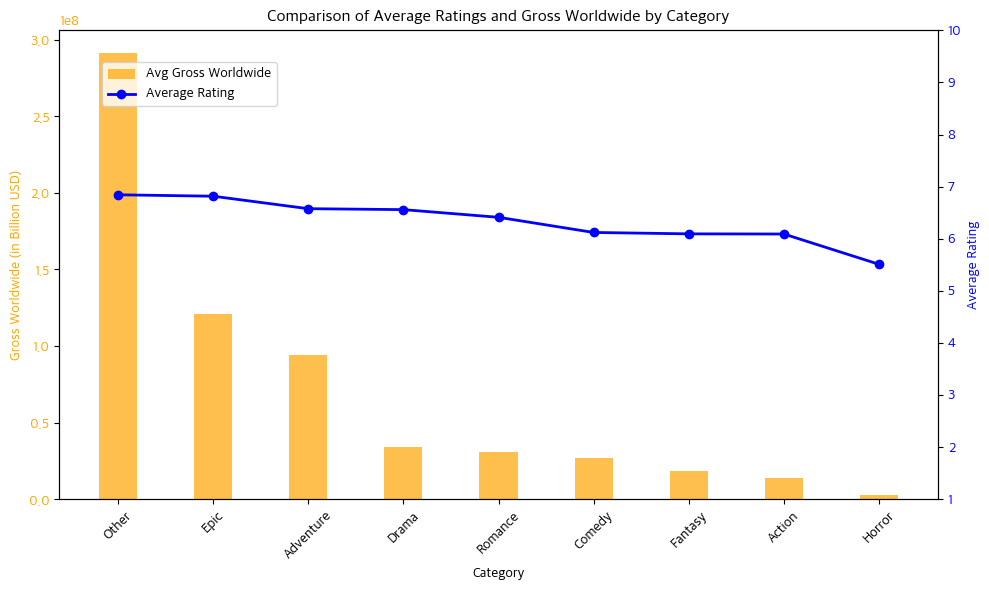

In [33]:
# 5. **장르별 평균 수익과 IMDb 평점의 관계**
#     - 각 장르의 흥행 성과와 관객 평가를 혼합 막대/꺾은선 그래프로 표현
# df_rating_gww = df.sort_values(by='Rating' ,ascending=False)

df_genre_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
df_genre_gww = df.groupby('Category')['grossWorldWide'].mean().sort_values(ascending=False)

print(df_genre_rating, df_genre_gww)
# 장르별 평점 및 수익
# plt.bar(df_genre_rating.index, df_genre_rating, color='blue', label='Rating')
# plt.plot(df_genre_gww.index, df_genre_gww, color='red', label='Gross Worldwide')
# plt.xticks(rotation=90)
# plt.show()
# x축과 바 높이 설정
categories = list(df_genre_rating.keys())
x = np.arange(len(categories))  # 카테고리별 위치
width = 0.4  # 바의 너비

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar Chart: Gross Worldwide
bar = ax1.bar(x, df_genre_gww, width, label='Avg Gross Worldwide', color='orange', alpha=0.7)
ax1.set_ylabel('Gross Worldwide (in Billion USD)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Line Plot: Ratings
ax2 = ax1.twinx()  # 두 번째 Y축 생성
line = ax2.plot(x, df_genre_rating, label='Average Rating', color='blue', marker='o', linewidth=2)
ax2.set_ylabel('Average Rating', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(1, 10)

# X축 설정
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation=45)
ax1.set_xlabel('Category')

# 범례 추가
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# 제목 및 레이아웃
plt.title('Comparison of Average Ratings and Gross Worldwide by Category')
plt.tight_layout()
plt.show()

In [34]:
# 예산 대비 수익률 높은 영화 top 10
df['profit'] = df['grossWorldWide'] / df['budget']
df['profit'].describe()

# 6. **예산 대비 수익률이 높은 영화 Top 10** (수상 이력이 있고 예산이 1억 이상인 영화 중)
df[(df.budget >= 10000) & (df.Wins > 1) & (df.Languages.str.contains('English'))].sort_values(by='profit', ascending=False).head(10)

,Title,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,...,countries_origin,filming_locations,production_companies,Languages,nominations,oscars,Category,country,profit,Wins
1026,27. Paranormal Activity,2007,86.0,R,6.3,263000.0,1.500000e+04,193355933.0,107918810.0,77873.0,...,['United States'],"['Bavarian Drive, Rancho Peñasquitos, San Dieg...","['Paramount Pictures', 'Dreamworks Pictures', ...",['English'],12,0,Horror,United States,12890.395533,12
657,158. Once,2006,86.0,R,7.8,123000.0,1.500000e+05,22311642.0,9439923.0,61901.0,...,"['Ireland', 'United States']","[""Waltons World of Music, 69-70 South Great Ge...","['Samson Films', 'Summit Entertainment', 'Bord...","['English', 'Czech']",31,0,Romance,Ireland,148.744280,31
9067,118. Skinamarink,2022,100.0,Not Rated,4.7,18000.0,1.500000e+04,2116254.0,2052272.0,818943.0,...,['United States'],"['Edmonton, Alberta, Canada']","['BayView Entertainment', 'ERO Picture Company...",['English'],5,0,Horror,United States,141.083600,5
3843,144. Frances Ha,2012,86.0,R,7.4,97000.0,6.500000e+04,8987134.0,4069826.0,137398.0,...,"['United States', 'Brazil']","['Sacramento, California, USA']","['Pine District Pictures', 'RT Features', 'Sco...","['English', 'French']",49,0,Comedy,United States,138.263600,49
2855,156. Catfish,2010,87.0,PG-13,7.1,44000.0,3.000000e+04,3533711.0,3237343.0,257285.0,...,['United States'],"['Ishpeming, Michigan, USA']","['Supermarché', 'Hit The Ground Running Films']",['English'],7,0,Drama,United States,117.790367,7
196,197. Keeping Mum,2005,99.0,R,6.8,37000.0,1.690000e+05,18586834.0,1619466.0,27112.0,...,"['United Kingdom', 'Isle of Man', 'United Stat...","['Pickering Railway Station, 12 Park Street, P...","['Summit Entertainment', 'Isle of Man Film', '...",['English'],5,0,Comedy,United Kingdom,109.981266,5
6893,94. Searching,2018,102.0,PG-13,7.6,184000.0,8.800000e+05,75462037.0,26020957.0,388769.0,...,"['United States', 'Russia']",['Unknown Location'],"['Screen Gems', 'Stage 6 Films', 'Bazelevs Pro...",['English'],10,0,Drama,United States,85.752315,10
9560,11. Taylor Swift: The Eras Tour,2023,169.0,PG-13,8.0,24000.0,3.670882e+06,261656269.0,180756269.0,93224755.0,...,['United States'],"['SoFi Stadium - 1001 Stadium Drive, Inglewood...","['Silent House', 'Taylor Swift Productions']",['English'],9,0,Other,United States,71.278850,9
2761,62. Insidious,2010,103.0,PG-13,6.8,349000.0,1.500000e+06,100106454.0,54009150.0,13271464.0,...,"['United States', 'Canada']","['Herald Examiner - 1111 S. Broadway, Downtown...","['FilmDistrict', 'Stage 6 Films', 'Alliance']",['English'],16,0,Horror,United States,66.737636,16
9018,69. Terrifier 2,2022,138.0,Not Rated,6.1,69000.0,2.500000e+05,15741780.0,10962499.0,805000.0,...,['United States'],"[""QXT's Night Club - 248 Mulberry St, Newark, ...","['Dark Age Cinema', 'Fuzz on the Lens Producti...",['English'],12,0,Horror,United States,62.967120,12
